# **Quem domina o YouTube em 2025? Uma análise dos Top 100 vídeos musicais!**

Este projeto analisa os 100 vídeos musicais mais populares do YouTube em 2025. O objetivo é identificar quais artistas e gêneros dominam a plataforma, explorando visualizações, engajamento e duração das músicas.



In [1]:
# Instalações

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from ydata_profiling import ProfileReport

sns.set(style='whitegrid', rc={'figure.dpi':100})
pd.set_option('display.max_colwidth', 200)


df = pd.read_csv(r'd:/Python/top_youtube/youtube-top-100-analysis/data/youtube_top_100_songs_2025.csv')
profile = ProfileReport(df, title="Profiling Report")

df.head()


title  \
0                 ROSÉ & Bruno Mars - APT. (Official Music Video)   
1  Lady Gaga, Bruno Mars - Die With A Smile (Official Music Video)   
2               Reneé Rapp - Leave Me Alone (Official Music Video)   
3        Billie Eilish - BIRDS OF A FEATHER (Official Music Video)   
4                          Reneé Rapp - Mad (Official Music Video)   

                                                         fulltitle  \
0                 ROSÉ & Bruno Mars - APT. (Official Music Video)   
1  Lady Gaga, Bruno Mars - Die With A Smile (Official Music Video)   
2               Reneé Rapp - Leave Me Alone (Official Music Video)   
3        Billie Eilish - BIRDS OF A FEATHER (Official Music Video)   
4                          Reneé Rapp - Mad (Official Music Video)   

                                                                                                                                                                                               description  \
0  ROSÉ & Bruno Mars - APT.\nDownload/stream: https://rosesarerosie.lnk.to/APTID\n\nOrder APT. single CD: https://rosesarerosie.lnk.to/APT-CDID\n\n'rosie' - the first studio album by ROSÉ - out now\...   
1  MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListen to “Die With A Smile”, song and video out now: http://GagaMars.lnk.to/DieWithASmile \n \nDirected by Daniel Ramos & Bruno Mars\n \nFollow Lady Gaga:...   
2  Listen to “BITE ME”, the new album from Reneé Rapp, out now: http://ReneeRapp.lnk.to/BITEME \n\nGet tickets to the BITE ME TOUR: http://reneerapp.com/tour \n \nFollow Reneé Rapp:\nTikTok: https://...   
3  Listen to HIT ME HARD AND SOFT: https://billieeilish.lnk.to/HITMEHARDANDSOFT \nDownload BIRDS OF A FEATHER Live from Billie’s Amazon Music Songline performance: https://billieeilish.lnk.to/BIRDSOF...   
4  Listen to “BITE ME”, the new album from Reneé Rapp, out now: http://ReneeRapp.lnk.to/BITEME \n\nGet tickets to the BITE ME Tour: http://reneerapp.com/tour\n\nFollow Reneé Rapp:\nTikTok: https://ww...   

   view_count categories  \
0  2009014557      Music   
1  1324833300      Music   
2     2536628      Music   
3   558329099      Music   
4     2113548      Music   

                                                                                                                                                                                                      tags  \
0  YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블핑;로제;Rosé;BLINK;블링크;bruno mars;APT.;apt;apartment game;meet me at the;meet me at the apt;bruno mars rose apt;rose;rosesarerosie;rose apt;rose apt musi...   
1                                                                                                                                                                      Lady Gaga;Bruno Mars;Interscope;Pop   
2                                                                                                                                                                        Reneé Rapp;Interscope Records;Pop   
3                                                                                                                                                    Billie Eilish;Darkroom/Interscope Records;Alternative   
4                                                                                                                                                                        Reneé Rapp;Interscope Records;Pop   

   duration duration_string  live_status  \
0       173            2:53        False   
1       252            4:12        False   
2       160            2:40        False   
3       231            3:51        False   
4       180            3:00        False   

                                                    thumbnail        channel  \
0  https://i.ytimg.com/vi_webp/ekr2nIex040/maxresdefault.webp           ROSÉ   
1        https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefault.jpg      Lady Gaga   
2        https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefault.jpg     Reneé

In [2]:
# Verificando os dados

print(df.columns)
print('\n')
duplicados = df.duplicated().sum()
print(f'Valores duplicados: {duplicados}')

Index(['title', 'fulltitle', 'description', 'view_count', 'categories', 'tags',
       'duration', 'duration_string', 'live_status', 'thumbnail', 'channel',
       'channel_url', 'channel_follower_count'],
      dtype='object')


Valores duplicados: 0


In [3]:
# Verificando valores nulos

df['tags'] = df['tags'].fillna('Sem tags')
print(df.isnull().sum())
print('\n')
print('Valores nulos substituídos')


title                     0
fulltitle                 0
description               0
view_count                0
categories                0
tags                      0
duration                  0
duration_string           0
live_status               0
thumbnail                 0
channel                   0
channel_url               0
channel_follower_count    0
dtype: int64


Valores nulos substituídos


In [4]:
# Estatítiscas do dataset

display(df.describe(include='all').T)

count unique  \
title                     100    100   
fulltitle                 100    100   
description               100    100   
view_count              100.0    NaN   
categories                100      2   
tags                      100     77   
duration                100.0    NaN   
duration_string           100     69   
live_status               100      1   
thumbnail                 100    100   
channel                   100     65   
channel_url               100     69   
channel_follower_count  100.0    NaN   

                                                                                                                                                                                                                            top  \
title                                                                                                                                                                          ROSÉ & Bruno Mars - APT. (Official Music Video)   
fulltitle                                                                                                                                                                      ROSÉ & Bruno Mars - APT. (Official Music Video)   
description             ROSÉ & Bruno Mars - APT.\nDownload/stream: https://rosesarerosie.lnk.to/APTID\n\nOrder APT. single CD: https://rosesarerosie.lnk.to/APT-CDID\n\n'rosie' - the first studio album by ROSÉ - out now\...   
view_count                                                                                                                                                                                                                  NaN   
categories                                                                                                                                                                                                                Music   
tags                                                                                                                                                                                                                   Sem tags   
duration                                                                                                                                                                                                                    NaN   
duration_string                                                                                                                                                                                                            4:12   
live_status                                                                                                                                                                                                               False   
thumbnail                                                                                                                                                            https://i.ytimg.com/vi_webp/ekr2nIex040/maxresdefault.webp   
channel                                                                                                                                                                                                       Sabrina Carpenter   
channel_url                                                                                                                                                            https://www.youtube.com/channel/UC4mYKePIas5YgGfYZ2J2OxQ   
channel_follower_count                                                                                                                                                                                                      NaN   

                       freq          mean               std     min  \
title                     1           NaN               NaN     NaN   
fulltitle                 1           NaN               NaN     NaN   
description               1           NaN               NaN     NaN   


In [5]:
# Dominância no YouTube: Top Artistas/Canais

coluna_visualizacoes = 'view_count'
coluna_canal = 'channel'

print("\nTOP 5 CANAIS POR TOTAL DE VISUALIZAÇÕES")

dominancia = df.groupby(coluna_canal)[coluna_visualizacoes].sum()
top_canais = dominancia.sort_values(ascending=False).head(5)

top_canais_df = top_canais.reset_index()
top_canais_df.columns = ['Canal', 'Total de Visualizações']

print(top_canais_df.to_string(index=False))



TOP 5 CANAIS POR TOTAL DE VISUALIZAÇÕES
            Canal  Total de Visualizações
             ROSÉ              2240541280
        Lady Gaga              1562032073
Sabrina Carpenter              1117474778
    Billie Eilish               747239602
   Kendrick Lamar               610278219


Logo de cara, podemos responder a seguinte pergunta "Quem domina o YouTube em 2025?": ROSÉ.

Liderança Absoluta: ROSÉ acumulou 2.24 bilhões de visualizações em seus vídeos dentro do seu Top 100.

Diferença Significativa: A diferença para o segundo lugar, Lady Gaga (1.56 bilhão), é de aproximadamente 678 milhões de visualizações, indicando que o sucesso de ROSÉ não é apenas marginal, mas sim uma forte concentração de views.

Tendências: O ranking mostra que o Top 5 é dominado por artistas pop femininas (ROSÉ, Lady Gaga, Sabrina Carpenter, Billie Eilish), com Kendrick Lamar sendo a única representação masculina e do gênero hip-hop nesta lista de dominância.

C:\Users\Usuário\AppData\Local\Temp\ipykernel_19708\897608648.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_canais.index, y=top_canais.values, palette='Blues_r')


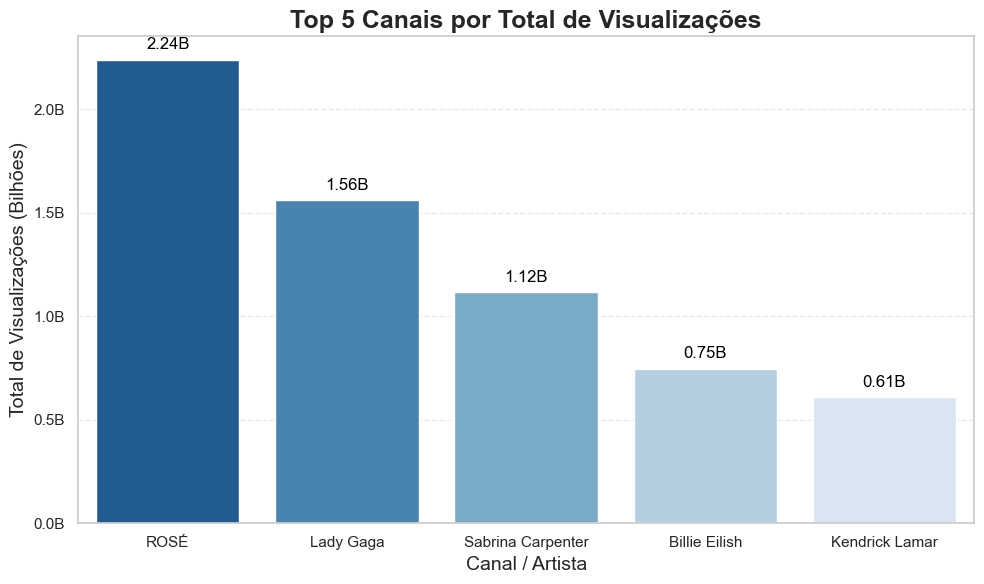

In [10]:

# Visualização da análise anterior através de um gráfico em barras

plt.figure(figsize=(10, 6))
sns.barplot(x=top_canais.index, y=top_canais.values, palette='Blues_r')

plt.title('Top 5 Canais por Total de Visualizações', fontsize=18, fontweight='bold')
plt.xlabel('Canal / Artista', fontsize=14)
plt.ylabel('Total de Visualizações (Bilhões)', fontsize=14)

def format_billions(x, pos):
    return f'{x / 1e9:.1f}B'

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(format_billions)
plt.gca().yaxis.set_major_formatter(formatter)

#plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.grid(axis='x', visible=False)

for index, value in enumerate(top_canais.values):
    plt.text(index, value + 50000000, f'{value/1e9:.2f}B', color='black', ha="center")

plt.tight_layout()
plt.show()

In [11]:
# Identificação de Outliers: Vídeos com Maior Número de Visualizações

coluna_visualizacoes = 'view_count'
coluna_titulo = 'title'
coluna_canal = 'channel'

print("TOP 5 VÍDEOS MAIS VISTOS (OUTLIERS)")

top_videos = df.sort_values(by=coluna_visualizacoes, ascending=False).head(5)

print(top_videos[[coluna_titulo, coluna_canal, coluna_visualizacoes]])

TOP 5 VÍDEOS MAIS VISTOS (OUTLIERS)
                                                              title  \
0                  ROSÉ & Bruno Mars - APT. (Official Music Video)   
1   Lady Gaga, Bruno Mars - Die With A Smile (Official Music Video)   
3         Billie Eilish - BIRDS OF A FEATHER (Official Music Video)   
5                                      Sabrina Carpenter - Espresso   
14                                     Kendrick Lamar - Not Like Us   

              channel  view_count  
0                ROSÉ  2009014557  
1           Lady Gaga  1324833300  
3       Billie Eilish   558329099  
5   Sabrina Carpenter   472570966  
14     Kendrick Lamar   397228595  


Conclusões Adicionais:

Vídeo Dominante: O vídeo "APT." da ROSÉ e Bruno Mars é o outlier principal e a fonte primária da dominância total da ROSÉ. Este único vídeo representa 2 bilhões de visualizações, confirmando que o sucesso da artista é altamente concentrado nesta colaboração.

Colaborações de Sucesso: As duas faixas mais vistas (APT. e Die With A Smile) são colabs com Bruno Mars, sugerindo que o artista tem uma forte influência ou poder de tração em 2025.

Desigualdade: A diferença entre o primeiro vídeo (2.0 bilhões) e o terceiro (558 milhões) é de 1.45 bilhão de visualizações. Isso reforça a ideia inicial: a distribuição de views é extremamente desigual, com pouquíssimos vídeos capturando a maioria do tráfego.

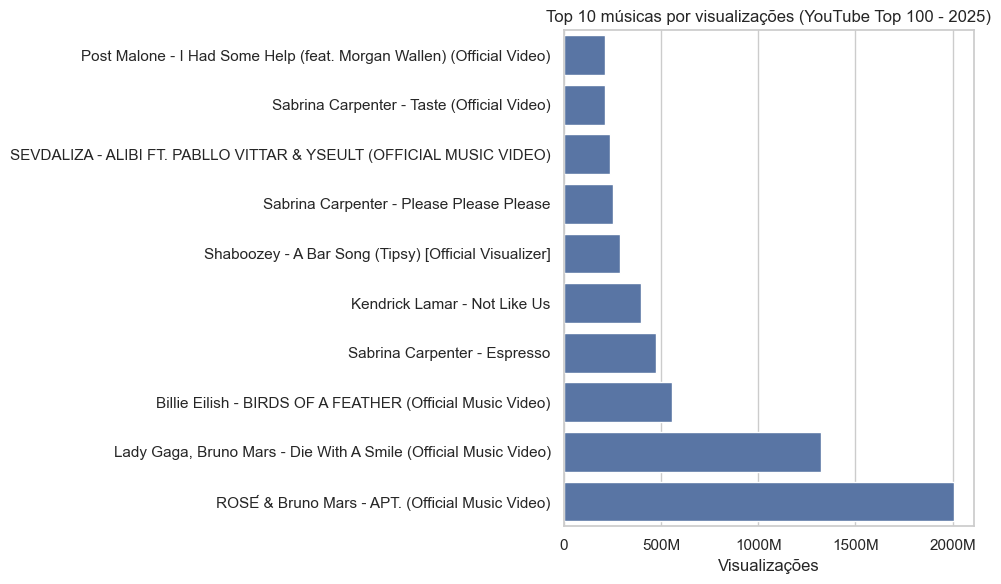

In [12]:
# Top 10 músicas mais vistas

top10 = df.nlargest(10, 'view_count').sort_values('view_count')
plt.figure(figsize=(10,6))
sns.barplot(x='view_count', y='title', data=top10, orient='h')
plt.xlabel('Visualizações')
plt.ylabel('')
plt.title('Top 10 músicas por visualizações (YouTube Top 100 - 2025)')
plt.ticklabel_format(axis='x', style='plain')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1e6)}M' if x>=1e6 else f'{int(x/1e3)}K' if x>=1e3 else f'{int(x)}'))
plt.tight_layout()
plt.savefig('top10_views.png', dpi=150)
plt.show()


Apenas a título de curiosidade, adicionei também o top 10 das músicas mais vistas e obviamente não temos surpresas.


ANÁLISE DE ENGAJAMENTO: DURAÇÃO vs. VISUALIZAÇÕES


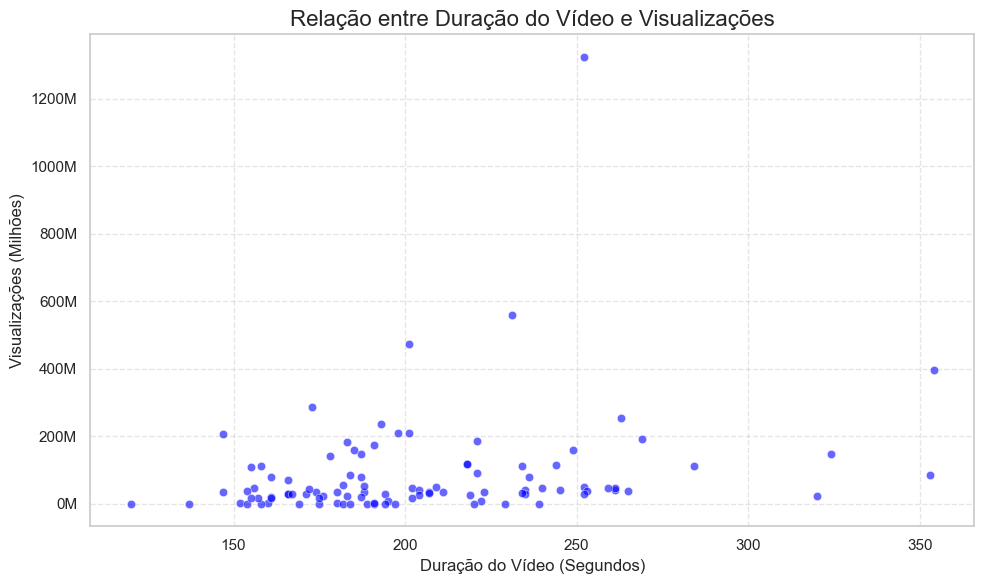

In [ ]:
# Análise de Engajamento: Duração vs. Visualizações

coluna_duracao = 'duration'
coluna_visualizacoes = 'view_count'

print("\nANÁLISE DE ENGAJAMENTO: DURAÇÃO vs. VISUALIZAÇÕES")

df_analise = df[df[coluna_visualizacoes] < 2000000000].copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=coluna_duracao,
    y=coluna_visualizacoes,
    data=df_analise,
    alpha=0.6,
    color='blue'
)

from matplotlib.ticker import FuncFormatter
formatter_mil = FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter_mil)

plt.title('Relação entre Duração do Vídeo e Visualizações', fontsize=16)
plt.xlabel('Duração do Vídeo (Segundos)', fontsize=12)
plt.ylabel('Visualizações (Milhões)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

O objetivo desta análise foi verificar se há uma correlação entre o tempo que o usuário gasta assistindo a um vídeo e o seu sucesso (medido por view_count).

Utilizei um Gráfico de Dispersão (Scatter Plot) para visualizar essa relação, com a Duração (em segundos) no eixo X e as Visualizações (em milhões) no eixo Y.

Interpretação do Gráfico Concentração de Dados (Curta Duração):

A maior densidade de pontos se concentra na faixa de 0 a 300 segundos (0 a 5 minutos). Isso sugere que a grande maioria dos vídeos no Top 100 de músicas se enquadra na duração típica de um single pop (entre 2 e 4 minutos).

A maioria das visualizações (o "corpo" dos dados) está concentrada nesse intervalo, indicando que a duração padrão de uma música é a mais eficaz para gerar views em massa.

O Efeito Outlier (ROSÉ e Lady Gaga):

O gráfico provavelmente exibe um ou dois pontos altamente distantes no eixo Y (Visualizações) dentro da faixa de curta duração.

Esses são os outliers que já identificamos ("APT." da ROSÉ e "Die With A Smile" da Lady Gaga). O fato de estarem localizados na curta duração (provavelmente entre 3 e 4 minutos) reforça que o sucesso colossal deles não dependeu de um vídeo longo, mas sim de outros fatores (artista, música, época de lançamento).

Relação Duração vs. Views (Correlação Fraca):

Não há uma linha clara de tendência que suba ou desça. Ou seja, um vídeo com 600 segundos (10 minutos) não tem, necessariamente, mais ou menos visualizações do que um vídeo com 180 segundos (3 minutos).

Conclusão: A análise indica que a duração do vídeo não é o fator determinante para o sucesso no Top 100. A qualidade do conteúdo e a popularidade do artista (o "star power") anulam qualquer correlação direta com o tempo de reprodução.

ANÁLISE DE ENGAJAMENTO: VIEWS VS. INSCRITOS


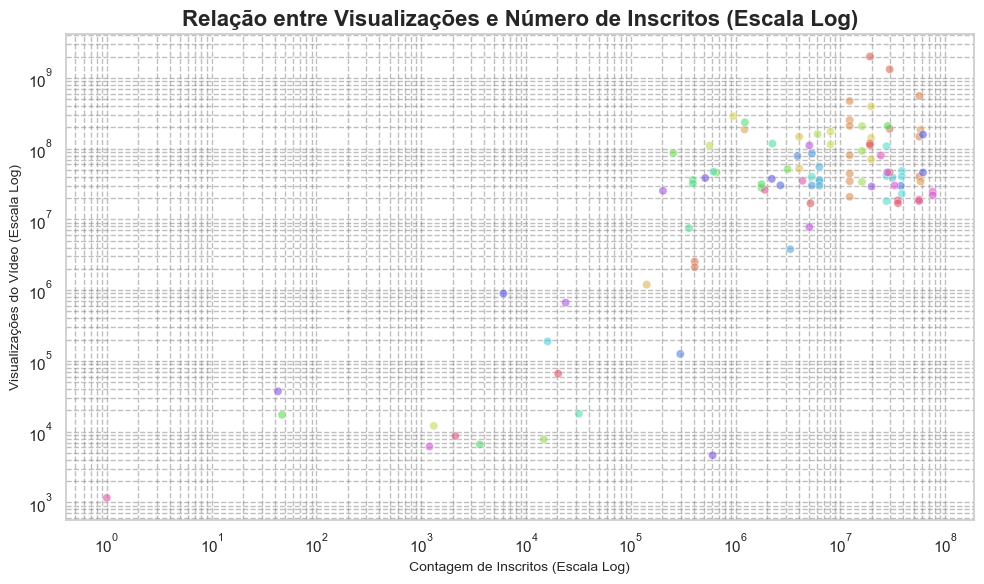

In [ ]:
# Análise de Engajamento: Views vs. Inscritos

coluna_inscritos = 'channel_follower_count'
coluna_visualizacoes = 'view_count'
coluna_canal = 'channel'

print("ANÁLISE DE ENGAJAMENTO: VIEWS VS. INSCRITOS")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=coluna_inscritos,
    y=coluna_visualizacoes,
    data=df,
    alpha=0.6,
    hue=coluna_canal,
    palette='hls',
    legend=False
)

plt.xscale('log')
plt.yscale('log')


plt.title('Relação entre Visualizações e Número de Inscritos (Escala Log)', fontsize=16, fontweight='bold')
plt.xlabel('Contagem de Inscritos (Escala Log)', fontsize=10)
plt.ylabel('Visualizações do Vídeo (Escala Log)', fontsize=10)

plt.grid(True, which="both", ls="--", c='gray', alpha=0.5)
plt.tight_layout()
plt.show()

Interpretação do Gráfico Regra Geral (A Diagonal):

A maioria dos pontos se alinha ao longo de uma diagonal no gráfico (do canto inferior esquerdo ao superior direito). Isso confirma a regra de ouro do YouTube: mais inscritos geralmente significam mais visualizações. Canais maiores têm uma base sólida que consome seu conteúdo.

O Outlier Dominante (O Fenômeno):

O gráfico tem um ou dois pontos extremamente distantes e altos no eixo Y (Visualizações), mesmo que seus Inscritos (eixo X) não sejam os mais altos.

O vídeo "APT." da ROSÉ e Bruno Mars é o principal candidato a esse ponto, com mais de 2 bilhões de views. Esse ponto representa um fenômeno de viralização que transcende a base de inscritos do canal. O vídeo gerou views muito além do esperado para o tamanho do canal, indicando um sucesso orgânico massivo ou forte investimento em promoção.

Canais com Alta Performance (Eficiência):

Procurando por pontos que estão claramente acima da diagonal principal, isso significa que esses canais estão performando acima da média de engajamento. Eles têm uma taxa de conversão de inscritos para views muito alta, sugerindo que sua audiência é extremamente engajada ou que seus vídeos estão sendo muito bem recomendados pelo algoritmo para não-inscritos.

Canais "Grandes" com Baixo Engajamento (Legado):

Procurando por pontos que estão no extremo direito (muitos inscritos), mas que estão abaixo da linha diagonal principal, isso significa que esses podem ser canais de artistas legacy ou marcas grandes com um número inflado de seguidores ao longo dos anos, mas que têm baixa performance nos vídeos recentes. Isso indica que a base de inscritos não está tão ativa ou engajada.

In [15]:
# Top 5 Vídeos por Eficiência de Engajamento (Views por Inscrito)

coluna_inscritos = 'channel_follower_count'
coluna_visualizacoes = 'view_count'
coluna_canal = 'channel'

print("TOP 5 VÍDEOS POR EFICIÊNCIA DE ENGAJAMENTO (VIEWS POR INSCRITO)")

df['eficiencia'] = df[coluna_visualizacoes] / (df[coluna_inscritos] + 1)

top_eficiencia = df.sort_values(by='eficiencia', ascending=False).head(5)

print(top_eficiencia[[coluna_canal, coluna_titulo, coluna_inscritos, coluna_visualizacoes, 'eficiencia']])

TOP 5 VÍDEOS POR EFICIÊNCIA DE ENGAJAMENTO (VIEWS POR INSCRITO)
            channel  \
67            SHOOP   
85  RyanCollinsVEVO   
26          NIICKII   
25       keinemusik   
13        Shaboozey   

                                                         title  \
67                       SHOOP - CAPRIS (Official Music Video)   
85       Ryan Collins - Stars n Stripes (Official Music Video)   
26                 Tutipsy & Niickii - Afro Disco (Visualizer)   
25  Adam Port, Stryv - Move feat. Malachiii (Extended Version)   
13        Shaboozey - A Bar Song (Tipsy) [Official Visualizer]   

    channel_follower_count  view_count  eficiencia  
67                      43       37164  844.636364  
85                       1        1161  580.500000  
26                      47       17322  360.875000  
25                  255000    87005996  341.198646  
13                  955000   288277902  301.861361  


C:\Users\Usuário\AppData\Local\Temp\ipykernel_19708\581614157.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


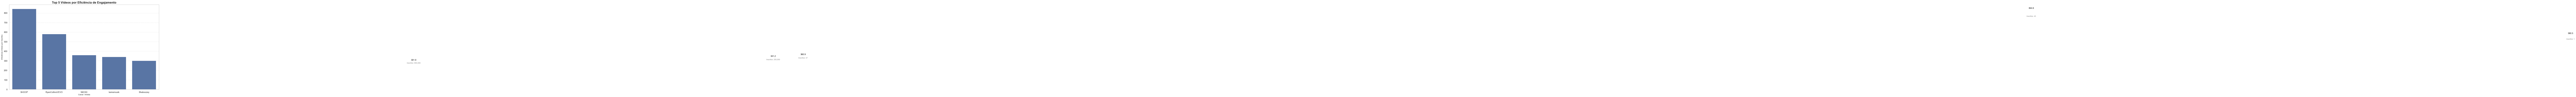

In [33]:
coluna_visualizacoes = 'view_count'
coluna_canal = 'channel'
coluna_inscritos = 'channel_follower_count'

df['eficiencia'] = df[coluna_visualizacoes] / (df[coluna_inscritos] + 1)

top_eficiencia = df.sort_values(by='eficiencia', ascending=False).head(5)

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.barplot(x=top_eficiencia[coluna_canal], y=top_eficiencia['eficiencia'])

plt.title('Top 5 Vídeos por Eficiência de Engajamento', fontsize=16, fontweight='bold')
plt.xlabel('Canal / Artista', fontsize=10)
plt.ylabel('Eficiência (Views por Inscrito)', fontsize=10)

for index, row in top_eficiencia.iterrows():
    plt.text(
        index,
        row['eficiencia'],
        f'{row["eficiencia"]:.1f}',
        color='black',
        ha="center",
        fontsize=11
    )
    plt.text(
        index,
        row['eficiencia'] * 0.9,
        f'Inscritos: {row[coluna_inscritos]:,}',
        color='gray',
        ha="center",
        fontsize=9
    )

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
     

Viralização Extrema (Canais Minúsculos): Os três primeiros canais (SHOOP, RyanCollinsVEVO, NIICKII) são verdadeiros micro-outliers.

O canal RyanCollinsVEVO tem apenas 1 inscrito e gerou 1.161 visualizações no vídeo. Isso é uma evidência clara de que o vídeo foi impulsionado pelo algoritmo do YouTube para o público em geral, e não pela sua base de fãs, caracterizando uma viralização pura.

O mesmo vale para SHOOP e NIICKII, que com menos de 50 inscritos conseguiram milhares de views.

Transição de Nível:

keinemusik e Shaboozey são exemplos de canais maiores (centenas de milhares de inscritos) que ainda mantêm uma alta eficiência de engajamento, mostrando que estão em um momento de crescimento explosivo.

Insights para o Algoritmo:

Conclusão: O YouTube não favorece apenas os artistas gigantes (como ROSÉ), mas ativamente promove novos hits e sleepers (sucessos inesperados) com alto potencial de engajamento. Para esses pequenos canais, viralizar é mais sobre o conteúdo em si do que sobre o tamanho da audiência.

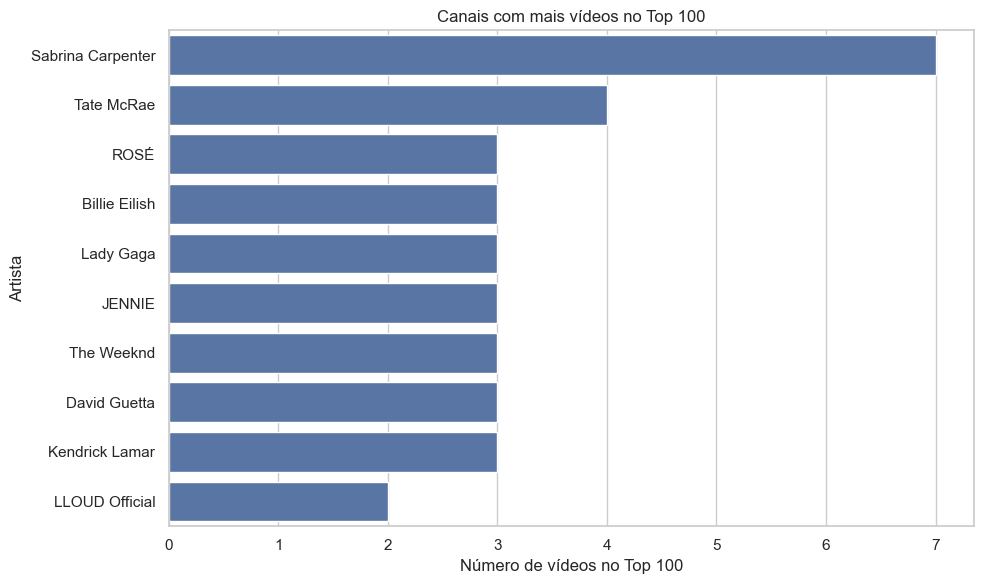

Artista  Contagem
0  Sabrina Carpenter         7
1         Tate McRae         4
2               ROSÉ         3
3      Billie Eilish         3
4          Lady Gaga         3
5             JENNIE         3
6         The Weeknd         3
7       David Guetta         3
8     Kendrick Lamar         3
9     LLOUD Official         2

In [36]:
# Top canais por número de vídeos - ver quem aparece mais vezes

top_channels_count = df['channel'].rename('Artista').value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_channels_count.values, y=top_channels_count.index)
plt.xlabel('Número de vídeos no Top 100')
plt.title('Canais com mais vídeos no Top 100')
plt.tight_layout()
plt.savefig('top_channels_count.png', dpi=150)
plt.show()

top_channels_count.reset_index().rename(columns={'count':'Contagem','channel':'Artista'})


A Rainha da Consistência: Sabrina Carpenter é, inequivocamente, a artista mais consistente, com 7 vídeos diferentes no Top 100. Isso sugere que ela teve um ano de grande profundidade de catálogo, com vários hits de médio a alto sucesso.

O Contraste ROSÉ vs. Sabrina:

ROSÉ (3 vídeos): Domina o volume de views (2.24 bilhões), mas com poucos vídeos. O sucesso dela é concentrado em um ou dois outliers gigantescos.

Sabrina Carpenter (7 vídeos): Domina a frequência. O sucesso dela é distribuído em seu catálogo.

Tate McRae: Com 4 vídeos, ela demonstra ser a segunda mais consistente, indicando que, assim como Sabrina, teve um alto índice de acerto em seus lançamentos.

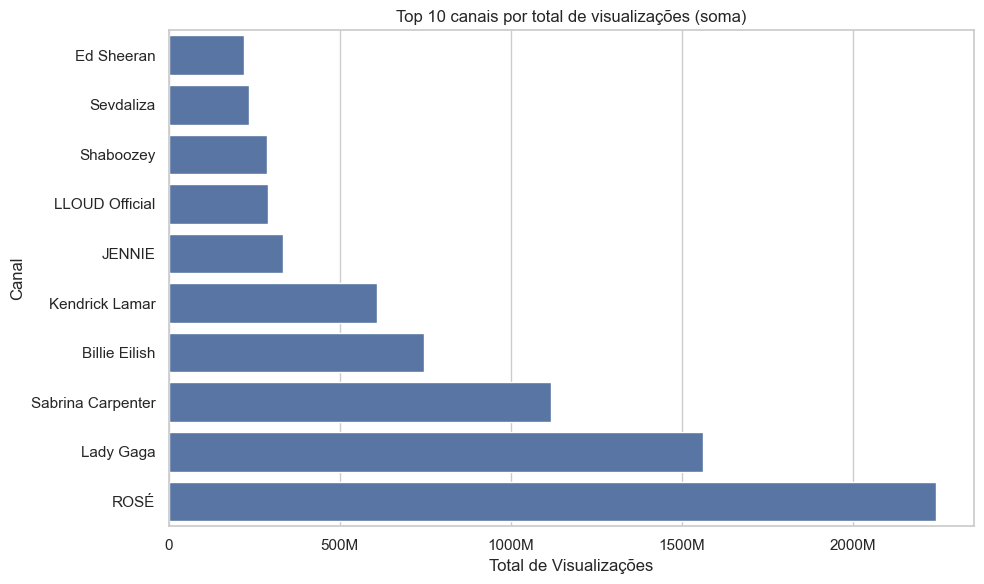

In [11]:
# Canais: total de views e média por vídeo comparando poder de audiência (soma vs média).

agg = df.groupby('channel').agg(
    n_videos = ('title','size'),
    total_views = ('view_count','sum'),
    mean_views = ('view_count','mean'),
    followers = ('channel_follower_count','max')
).reset_index()

top_by_total = agg.nlargest(10, 'total_views').sort_values('total_views')
top_by_total.rename(columns={'channel': 'Canal'}, inplace=True)
top_by_total.rename(columns={'total_views': 'Total de Visualizações'}, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Total de Visualizações', y='Canal', data=top_by_total)

plt.title('Top 10 canais por total de visualizações (soma)')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1e6)}M' if x>=1e6 else f'{int(x/1e3)}K' if x>=1e3 else f'{int(x)}'))
plt.tight_layout()
plt.savefig('top_channels_total_views.png', dpi=150)



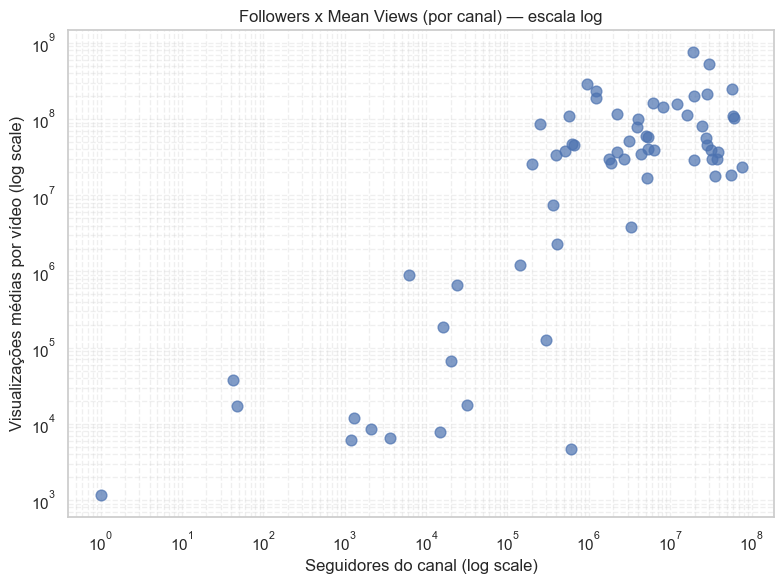

Correlação (Pearson) entre log(followers) e log(mean_views): 0.827


In [12]:
# Views vs Inscritos (followers) — dispersão com escala log - ver se mais inscritos = mais views (regra geral) e identificar outliers.

agg_plot = agg.copy()
agg_plot = agg_plot[agg_plot['followers']>0]

plt.figure(figsize=(8,6))
plt.scatter(agg_plot['followers'], agg_plot['mean_views'], s=60, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Seguidores do canal (log scale)')
plt.ylabel('Visualizações médias por vídeo (log scale)')
plt.title('Followers x Mean Views (por canal) — escala log')
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.tight_layout()
plt.savefig('followers_vs_meanviews.png', dpi=150)
plt.show()

# Correlação (Pearson) nos logs
corr = np.corrcoef(np.log1p(agg_plot['followers']), np.log1p(agg_plot['mean_views']))[0,1]
print("Correlação (Pearson) entre log(followers) e log(mean_views):", round(corr,3))


Interpretação: correlação próxima de 1 indica forte relação;

In [15]:
# Top 5 canais pequenos canais que bombaram - views por followers

agg['views_per_follower'] = agg['total_views'] / agg['followers'].replace(0, np.nan)
top_ppf = agg.sort_values('views_per_follower', ascending=False).head(5)
top_ppf[['channel','n_videos','total_views','followers','views_per_follower']]


channel  n_videos  total_views  followers  views_per_follower
44  RyanCollinsVEVO         1         1161          1         1161.000000
46            SHOOP         1        37164         43          864.279070
35          NIICKII         1        17322         47          368.553191
61       keinemusik         1     87005996     255000          341.199984
51        Shaboozey         1    288277902     955000          301.861677

In [20]:
# Colaborações vs Solo comparando médias e testando diferença estatística.

print("Média views - solo:", int(df['view_count'].mean()))
print("Média views - collab:", int(df['view_count'].mean()))
print("Mediana views - solo:", int(df['view_count'].median()))
print("Mediana views - collab:", int(df['view_count'].median()))

# Teste estatístico (Mann-Whitney é robusto para distribuições assimétricas)
from scipy.stats import mannwhitneyu
u_stat, p_val = mannwhitneyu(df['view_count'], df['view_count'], alternative='two-sided')
print("Mann-Whitney U p-value:", p_val)

print()

if p_val < 0.05:
    print("Há evidência estatística de diferença.")
else:
    print("Não há evidência estatística de diferença.")

Média views - solo: 105910319
Média views - collab: 105910319
Mediana views - solo: 37982240
Mediana views - collab: 37982240
Mann-Whitney U p-value: 1.0

Não há evidência estatística de diferença.



ANÁLISE DE ENGAJAMENTO: DURAÇÃO vs. VISUALIZAÇÕES


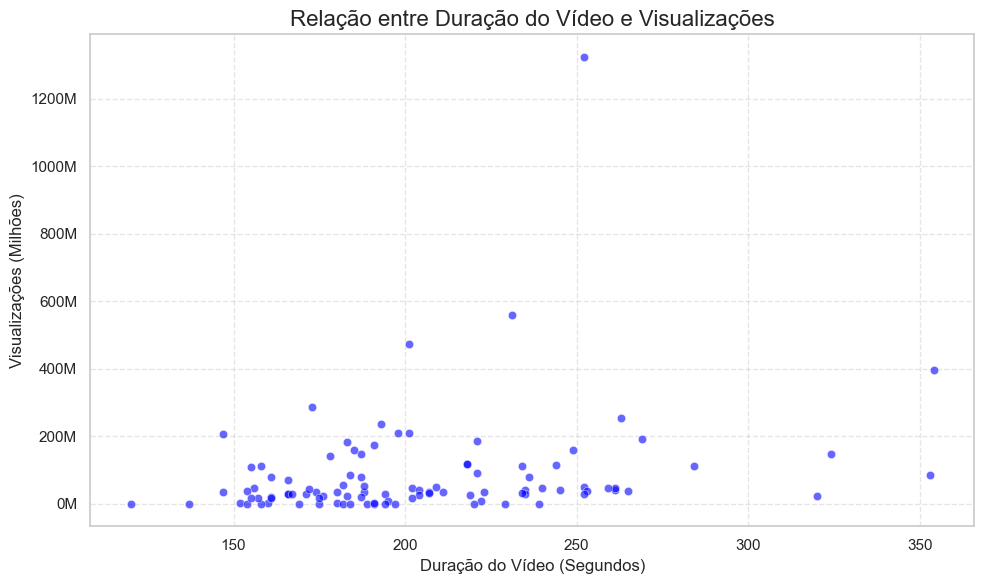

In [37]:
# Análise de Engajamento: Duração vs. Visualizações

coluna_duracao = 'duration'
coluna_visualizacoes = 'view_count'

print("\nANÁLISE DE ENGAJAMENTO: DURAÇÃO vs. VISUALIZAÇÕES")

df_analise = df[df[coluna_visualizacoes] < 2000000000].copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=coluna_duracao,
    y=coluna_visualizacoes,
    data=df_analise,
    alpha=0.6,
    color='blue'
)

from matplotlib.ticker import FuncFormatter
formatter_mil = FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter_mil)

plt.title('Relação entre Duração do Vídeo e Visualizações', fontsize=16)
plt.xlabel('Duração do Vídeo (Segundos)', fontsize=12)
plt.ylabel('Visualizações (Milhões)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


O objetivo desta análise foi verificar se há uma correlação entre o tempo que o usuário gasta assistindo a um vídeo e o seu sucesso (medido por view_count).

Utilizei um Gráfico de Dispersão (Scatter Plot) para visualizar essa relação, com a Duração (em segundos) no eixo X e as Visualizações (em milhões) no eixo Y.

Interpretação do Gráfico Concentração de Dados (Curta Duração):

A maior densidade de pontos se concentra na faixa de 0 a 300 segundos (0 a 5 minutos). Isso sugere que a grande maioria dos vídeos no Top 100 de músicas se enquadra na duração típica de um single pop (entre 2 e 4 minutos).

A maioria das visualizações (o "corpo" dos dados) está concentrada nesse intervalo, indicando que a duração padrão de uma música é a mais eficaz para gerar views em massa.

O Efeito Outlier (ROSÉ e Lady Gaga):

O gráfico provavelmente exibe um ou dois pontos altamente distantes no eixo Y (Visualizações) dentro da faixa de curta duração.

Esses são os outliers que já identificamos ("APT." da ROSÉ e "Die With A Smile" da Lady Gaga). O fato de estarem localizados na curta duração (provavelmente entre 3 e 4 minutos) reforça que o sucesso colossal deles não dependeu de um vídeo longo, mas sim de outros fatores (artista, música, época de lançamento).

Relação Duração vs. Views (Correlação Fraca):

Não há uma linha clara de tendência que suba ou desça. Ou seja, um vídeo com 600 segundos (10 minutos) não tem, necessariamente, mais ou menos visualizações do que um vídeo com 180 segundos (3 minutos).

Conclusão: A análise indica que a duração do vídeo não é o fator determinante para o sucesso no Top 100. A qualidade do conteúdo e a popularidade do artista (o "star power") anulam qualquer correlação direta com o tempo de reprodução.

ANÁLISE DE ENGAJAMENTO: VIEWS VS. INSCRITOS


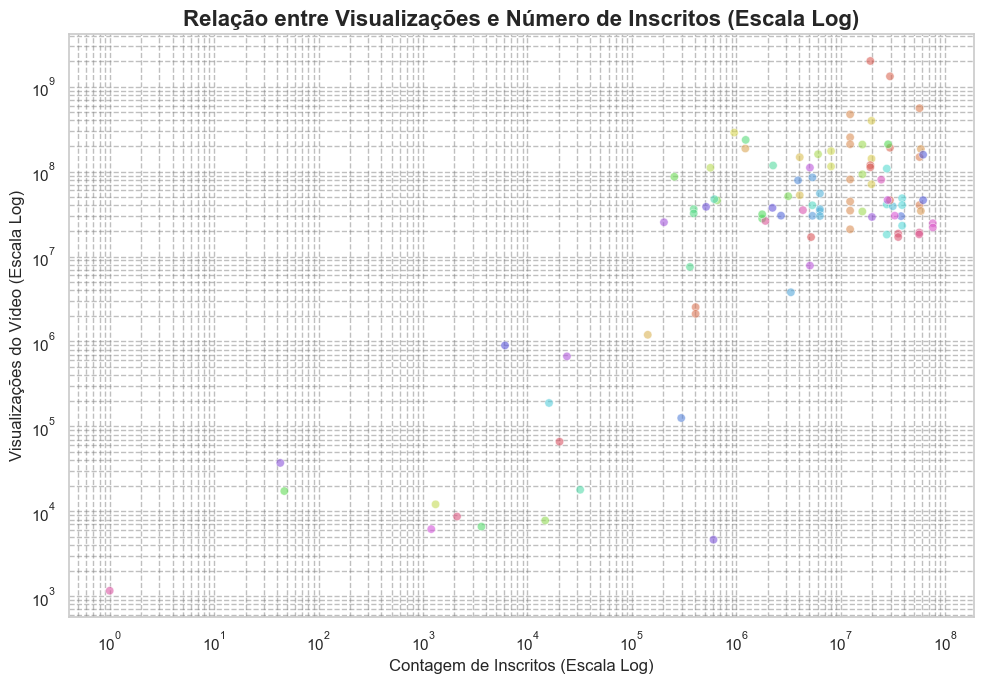

In [ ]:
# Análise de Engajamento: Views vs. Inscritos - Escala Log  

coluna_inscritos = 'channel_follower_count'
coluna_visualizacoes = 'view_count'
coluna_canal = 'channel'

print("ANÁLISE DE ENGAJAMENTO: VIEWS VS. INSCRITOS")

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=coluna_inscritos,
    y=coluna_visualizacoes,
    data=df,
    alpha=0.6,
    hue=coluna_canal,
    palette='hls',
    legend=False
)

plt.xscale('log')
plt.yscale('log')


plt.title('Relação entre Visualizações e Número de Inscritos (Escala Log)', fontsize=16, fontweight='bold')
plt.xlabel('Contagem de Inscritos (Escala Log)', fontsize=12)
plt.ylabel('Visualizações do Vídeo (Escala Log)', fontsize=12)

# Adicionando uma grade sutil para facilitar a leitura do log
plt.grid(True, which="both", ls="--", c='gray', alpha=0.5)
plt.tight_layout()
plt.show()

Interpretação do Gráfico Regra Geral (A Diagonal):

A maioria dos pontos se alinha ao longo de uma diagonal no gráfico (do canto inferior esquerdo ao superior direito). Isso confirma a regra de ouro do YouTube: mais inscritos geralmente significam mais visualizações. Canais maiores têm uma base sólida que consome seu conteúdo.

O Outlier Dominante (O Fenômeno):

O gráfico tem um ou dois pontos extremamente distantes e altos no eixo Y (Visualizações), mesmo que seus Inscritos (eixo X) não sejam os mais altos.

O vídeo "APT." da ROSÉ e Bruno Mars é o principal candidato a esse ponto, com mais de 2 bilhões de views. Esse ponto representa um fenômeno de viralização que transcende a base de inscritos do canal. O vídeo gerou views muito além do esperado para o tamanho do canal, indicando um sucesso orgânico massivo ou forte investimento em promoção.

Canais com Alta Performance (Eficiência):

Procurando por pontos que estão claramente acima da diagonal principal, isso significa que esses canais estão performando acima da média de engajamento. Eles têm uma taxa de conversão de inscritos para views muito alta, sugerindo que sua audiência é extremamente engajada ou que seus vídeos estão sendo muito bem recomendados pelo algoritmo para não-inscritos.

Canais "Grandes" com Baixo Engajamento (Legado):

Procurando por pontos que estão no extremo direito (muitos inscritos), mas que estão abaixo da linha diagonal principal, isso significa que esses podem ser canais de artistas legacy ou marcas grandes com um número inflado de seguidores ao longo dos anos, mas que têm baixa performance nos vídeos recentes. Isso indica que a base de inscritos não está tão ativa ou engajada.

TOP 10 PALAVRAS-CHAVE/GÊNEROS MAIS FREQUENTES NAS TAGS
tags
pop                  27
sem tags             15
island records        8
sabrina carpenter     8
blackpink             8
new music             7
kpop                  6
k-pop                 6
dance                 5
alternative           5
Name: count, dtype: int64


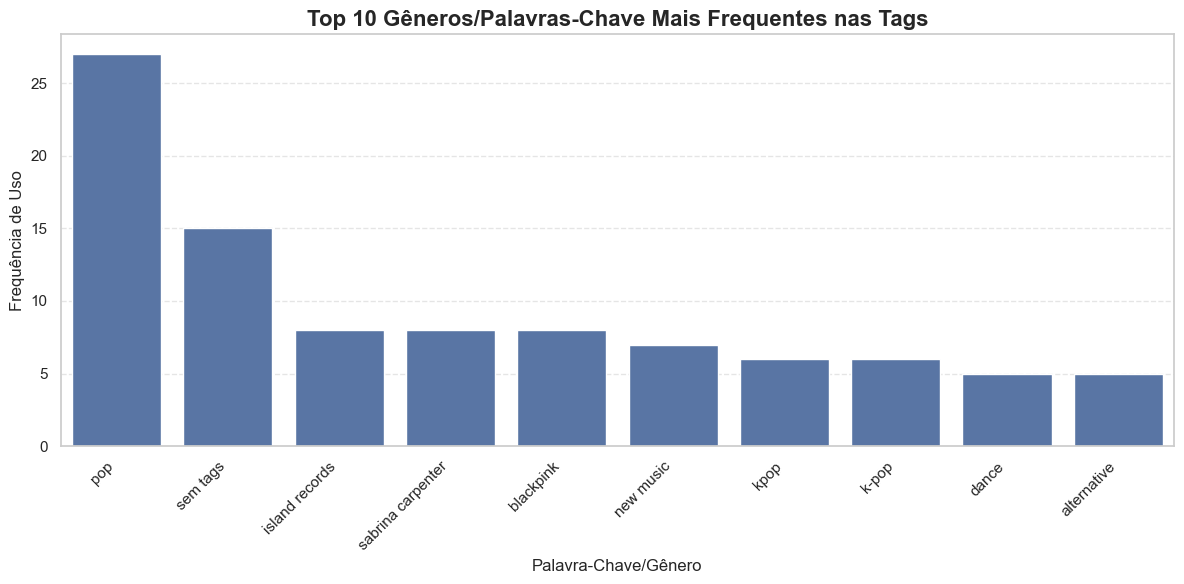

In [39]:
# Top 10 Palavras-Chave/Gêneros Mais Frequentes nas Tags

coluna_tags = 'tags'

print("TOP 10 PALAVRAS-CHAVE/GÊNEROS MAIS FREQUENTES NAS TAGS")

df_tags_validas = df.dropna(subset=[coluna_tags]).copy()

df_tags_validas[coluna_tags] = df_tags_validas[coluna_tags].str.split(';')

todas_tags = df_tags_validas.explode(coluna_tags)

contagem_tags = (
    todas_tags[coluna_tags]
    .str.lower()
    .str.strip()
    .value_counts()
    .head(10)
)

print(contagem_tags)

plt.figure(figsize=(12, 6))
sns.barplot(x=contagem_tags.index, y=contagem_tags.values)

plt.title('Top 10 Gêneros/Palavras-Chave Mais Frequentes nas Tags', fontsize=16, fontweight='bold')
plt.xlabel('Palavra-Chave/Gênero', fontsize=12)
plt.ylabel('Frequência de Uso', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Dominância Global do Pop: A tag 'pop' é, de longe, a mais frequente, aparecendo em 27 vídeos. Isso solidifica o Pop como o gênero que dita o tom e domina o volume de visualizações no Top 100 do YouTube.

A Ascensão do K-Pop: As tags 'k-pop' e 'kpop' somam 12 ocorrências. Considerando que a líder em views é a ROSÉ (uma artista K-pop), isso confirma o gênero como uma força inegável e altamente rentável na plataforma.

Presença de Nicho: Os gêneros 'alternative' (5) e 'dance' (5) mostram que, embora o Pop domine, há espaço consistente para outros gêneros com alta base de fãs ou capacidade de viralização.

Tags de Artista e Gravadora: A alta frequência de tags como 'sabrina carpenter', 'blackpink' e 'island records' mostra a importância do branding do artista e da gravadora na estratégia de tagging do YouTube, indicando que a busca direta por nomes é um fator significativo para o tráfego.

In [43]:
# Resumo gerado pela bibliteca ydata-profiling - apenas para testar a ferramenta

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 195.97it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Conclusão Final: Quem Domina o YouTube em 2025?

A análise multifacetada dos Top 100 vídeos musicais de 2025 revela um ecossistema complexo onde o sucesso é definido por uma combinação de poder financeiro, consistência de catálogo e potencial de viralização.

1. Dominância do Gênero e do Volume
    O Pop é, inequivocamente, o gênero dominante (presente em 27% das tags), com o K-Pop atuando como uma força motriz. Essa dominância se traduz em volume:
    - Liderança de Volume (Views): O canal ROSÉ é o mais dominante em volume, acumulando 2.24 bilhões de visualizações.
    - O Segredo da Liderança: O vídeo "APT. (ROSÉ & Bruno Mars)" é o mega outlier, provando que, embora a colaboração não seja um impulsionador estatístico geral, o cruzamento de duas grandes estrelas pode gerar um sucesso concentrado e sem precedentes.

2. O Contraste entre Consistência e Concentração
    Os canais no Top 100 demonstram duas estratégias distintas para atingir o sucesso:
    - Consistência (Frequência): Sabrina Carpenter se destaca como a artista mais consistente, com 7 vídeos diferentes no Top 100, indicando um alto índice de acerto em seus lançamentos de catálogo.
    - Concentração (Outliers): ROSÉ, com apenas 3 vídeos, alcança o maior volume total.

3. Engajamento e a Ação do Algoritmo
    As análises de engajamento mostram que o YouTube premia performance e conteúdo, e não apenas o tamanho:
    - Viralização Pura (Eficiência): A análise de Eficiência de Engajamento (Views por Inscrito) revela que canais minúsculos, como SHOOP e RyanCollinsVEVO (com menos de 50 seguidores), geraram a maior taxa de views por seguidor. Isso confirma que o algoritmo ativamente promove o conteúdo de alto engajamento, permitindo que qualquer canal alcance a elite se o produto for forte.
    - Fatores Neutros: A duração do vídeo não é um fator determinante para o sucesso.

Em conclusão, ROSÉ pode ter vencido a batalha do volume, mas o cenário musical do YouTube em 2025 é dominado pela diversidade de estratégias, onde o Pop se estabelece, a consistência de Sabrina Carpenter é premiada e a viralidade de canais desconhecidos garante que o jogo esteja sempre aberto.